In [14]:
import pickle
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
%matplotlib inline

from emissions_transformer import EmissionsTransformer

In [2]:
def load_data(database_filepath):
    """Loads the data from a database file and returns the target."""

    engine = create_engine(f'sqlite:///{database_filepath}')
    df = pd.read_sql_table('emissions', engine)

    return df

In [3]:
df = load_data('../data/emissions.db')
df.shape

(45511, 29)

In [4]:
def split_data(df):
    """
    INPUT - df - full car emissions df
    
    OUTPUT
    X_pop - parameter matrix for given tax band labels
    X_nan - parameter matrix of missing tax band values which cannot be used for training and testing the model. y_nan would be an empty
    """
    
    df_pop = df.dropna(subset=['tax_band'])
    
    df_nan = df[df['tax_band'].isnull()]
    X_nan = df_nan.drop(columns='tax_band')

    return df_pop, X_nan

In [5]:
df_pop, X_nan = split_data(df)
df_pop.shape, X_nan.shape

((7837, 29), (37674, 28))

In [6]:
def load_model(filepath):
    with open(filepath, 'rb') as file:
        model = pickle.load(file)
        
    return model

In [7]:
model = load_model('classifier.pkl')
model

GridSearchCV(estimator=Pipeline(steps=[('et',
                                        EmissionsTransformer(fts=array(['Petrol', 'Diesel', 'LPG', 'Petrol Hybrid', 'CNG',
       'Petrol Electric', 'LPG / Petrol', 'Petrol / E85 (Flex Fuel)',
       'Petrol / E85', 'Diesel Electric', 'Electricity/Petrol',
       'Electricity', 'Electricity/Diesel'], dtype=object),
                                                             mfs=array(['Alfa Romeo', 'Aston Martin Lagonda', 'Audi', 'BMW', 'Cadillac',
       'Chevr...
       '5 AMT', 'MTA5', 'i-SHIFT', 'A8', 'DCT7', 'M6-AWD', 'S6', 'A6x2',
       'D7', 'M7', 'A5-AWD', 'MultiDrive', 'MTA6', 'QD7', 'A6-AWD', 'DM6',
       'MCVT', 'Semi-Auto', 'AM5', 'Multi6', 'MultiDriv', 'DCT6', 'ET5',
       'QA8', '6AT', 'AMT6', 'AMT5', '7SP. SSG', None, 'M8', 'A8-AWD'],
      dtype=object),
                                                             tmts=array(['Manual', 'Automatic', None], dtype=object))),
                                       ('clf', Ra

In [9]:
y_nan = model.predict(X_nan)

(37674, 180)


In [10]:
def merge_data(df_pop, X_nan, y_nan):
    X_nan['tax_band'] = y_nan
    df_fill = pd.concat([X_nan, df_pop])
    return df_fill

In [12]:
df_fill = merge_data(df_pop, X_nan, y_nan)
df_fill.shape

(45511, 29)

In [35]:
df_fill['tax_band'].unique()

array(['I', 'J', 'E', 'G', 'M', 'F', 'L', 'K', 'H', 'D', 'C', 'B', 'A'],
      dtype=object)

In [16]:
df_fill['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013], dtype=int64)

In [19]:
df_fill['manufacturer'].value_counts()

Mercedes-Benz    5836
Vauxhall         4139
Volkswagen       3593
BMW              2943
Ford             2916
                 ... 
Dacia               9
MG Motors Uk        8
McLaren             8
Tata                7
MG Motors UK        5
Name: manufacturer, Length: 62, dtype: int64

In [36]:
df_mb = df_fill[df_fill['manufacturer'] == 'Mercedes-Benz']
df_mb.shape

(5836, 29)

In [37]:
df_mb['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013], dtype=int64)

<AxesSubplot:xlabel='year,tax_band'>

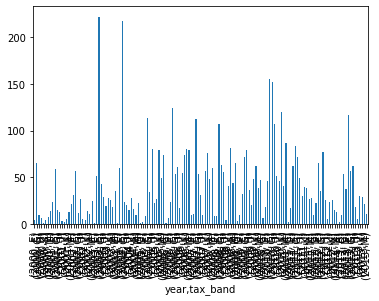

In [52]:
df_mb_band_history = df_mb.groupby(by=['year','tax_band']).count()['manufacturer']
df_mb_band_history.plot.bar()

In [18]:
df['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013], dtype=int64)

In [53]:
def average_label_history(df):
    label_mapping = { 'A': 12, 'B': 11, 'C': 10, 'D': 9, 'E': 8, 'F': 7, 'G': 6, 'H': 5, 'I': 4, 'J': 3, 'K': 2, 'L': 1 }
    df['tax_band_int'] = df['tax_band'].map(label_mapping)
    df_grouped = df[['year','tax_band_int']].groupby(by='year').mean()
    print(df_grouped)
    plt.plot(df_grouped)


      tax_band_int
year              
2000      5.810135
2001      5.401251
2002      5.029899
2003      5.653887
2004      5.821453
2005      5.032506
2006      4.848125
2007      4.687848
2008      4.840040
2009      5.165637
2010      5.530024
2011      6.143019
2012      6.761238
2013      7.253850


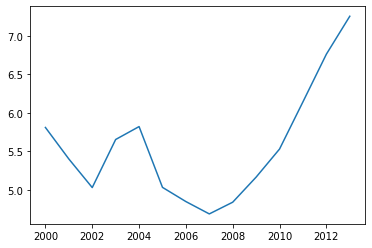

In [54]:
average_label_history(df_fill)

In [55]:
df['manufacturer'].unique()

array(['Alfa Romeo', 'Aston Martin Lagonda', 'Audi', 'BMW', 'Cadillac',
       'Chevrolet', 'Chrysler Jeep', 'Citroen', 'Daewoo Cars', 'Daihatsu',
       'Ferrari', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar Cars', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus',
       'Lotus', 'LTI', 'Maserati', 'Mazda', 'Mercedes-Benz', 'Metrocab',
       'Micro Compact Car', 'Mitsubishi', 'Nissan', 'Perodua', 'Peugeot',
       'Porsche', 'Proton', 'Renault', 'Rolls-Royce',
       'Rover Group Limited', 'Saab', 'Seat', 'Skoda', 'Subaru', 'Suzuki',
       'Tata', 'Toyota', 'Vauxhall', 'Volkswagen', 'Volvo',
       'MG Rover Group', 'Mini', 'Morgan Motor Company', 'Bentley Motors',
       'Smart', 'SsangYong', 'Corvette', 'Dodge', 'Hummer', 'Abarth',
       'Infiniti', 'MG Motors Uk', 'McLaren', 'Dacia', 'MG Motors UK'],
      dtype=object)

In [56]:
def plot_average_label_history_by_manufacturer(df):
    label_mapping = { 'A': 12, 'B': 11, 'C': 10, 'D': 9, 'E': 8, 'F': 7, 'G': 6, 'H': 5, 'I': 4, 'J': 3, 'K': 2, 'L': 1 }
    df['tax_band_int'] = df['tax_band'].map(label_mapping)
    df_grouped = df[['year','manufacturer','tax_band_int']].groupby(by=['manufacturer','year']).mean()
    
    for _, manufacturer in df_grouped.groupby(level=0):
        label = manufacturer.index.get_level_values(0)[0]
        x = manufacturer.index.get_level_values(1)
        y = manufacturer['tax_band_int'].values
        plt.plot(x, y, label=label)
        
    plt.xlabel('Year')
    plt.ylabel('Tax band mean')
    plt.legend()
    plt.show()

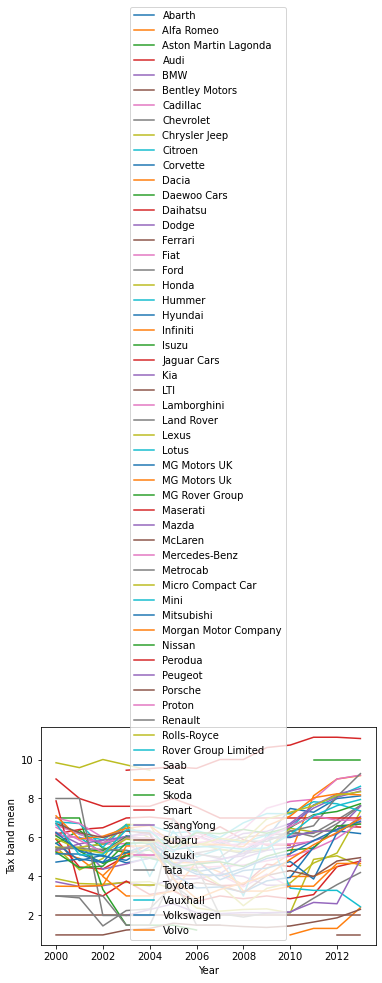

In [57]:
plot_average_label_history_by_manufacturer(df_fill)

In [116]:
def plot_average_label_history_by_manufacturer_only_large(df):
    manufacturers = df['manufacturer'].value_counts()
    large_man = manufacturers.index[:4]
    df = df[df['manufacturer'].isin(large_man)]
    
    label_mapping = { 'A': 12, 'B': 11, 'C': 10, 'D': 9, 'E': 8, 'F': 7, 'G': 6, 'H': 5, 'I': 4, 'J': 3, 'K': 2, 'L': 1, 'M': 0 }

    tax_bands = df['tax_band']
    tax_band_ints = tax_bands.map(label_mapping)
    tax_band_ints_int = tax_band_ints.astype('float')
    print(tax_band_ints_int.dtypes)
    print(tax_band_ints_int.unique())
    
    df.loc[:, 'tax_band_int'] = tax_band_ints_int
#     df['tax_band_int'] = df['tax_band_int'].map(label_mapping).astype('int')
#     print(df.dtypes)
#     df['tax_band_int'].map(label_mapping)
    df_grouped = df[['year','manufacturer','tax_band_int']].groupby(by=['manufacturer','year']).mean()
    
    for _, manufacturer in df_grouped.groupby(level=0):
        label = manufacturer.index.get_level_values(0)[0]
        x = manufacturer.index.get_level_values(1)
        y = manufacturer['tax_band_int'].values
        plt.plot(x, y, label=label)
        
    plt.xlabel('Year')
    plt.ylabel('Tax band mean')
    plt.legend(loc='upper left')
    plt.figure(figsize=(16,16))
    plt.show()
        


float64
[ 4.  8.  0.  2.  1.  7.  3.  6.  5. 10.  9. 11. 12.]


C:\Pim\Docs\u-data-science-car-emission\.venv\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


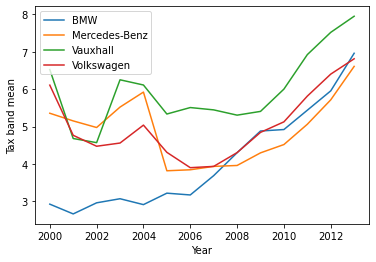

<Figure size 1152x1152 with 0 Axes>

In [117]:
plot_average_label_history_by_manufacturer_only_large(df_fill)